In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display

In [2]:
dataset_path = Path("/Users/mkurtys/datasets/spine")

In [3]:
descriptions = pd.read_csv(dataset_path/"train_series_descriptions.csv")
coordinates = pd.read_csv(dataset_path/"train_label_coordinates.csv")
submissions = pd.read_csv(dataset_path/"sample_submission.csv")
train = pd.read_csv(dataset_path/"train.csv")

In [4]:
display(train.head(2))
display(descriptions.head(2))
display(coordinates.head(2))
display(submissions.head(2))

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild


,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1


,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286


,row_id,normal_mild,moderate,severe
0,44036939_left_neural_foraminal_narrowing_l1_l2,0.333333,0.333333,0.333333
1,44036939_left_neural_foraminal_narrowing_l2_l3,0.333333,0.333333,0.333333


In [5]:
descriptions.head()

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1


In [6]:
descriptions.groupby("study_id").agg(list)

,series_id,series_description
study_id,,
4003253,"[702807833, 1054713880, 2448190387]","[Sagittal T2/STIR, Sagittal T1, Axial T2]"
4646740,"[3201256954, 3486248476, 3666319702]","[Axial T2, Sagittal T1, Sagittal T2/STIR]"
7143189,"[132939515, 1951927562, 3219733239]","[Sagittal T2/STIR, Axial T2, Sagittal T1]"
8785691,"[481125819, 1570286759, 2406919186]","[Sagittal T2/STIR, Sagittal T1, Axial T2]"
10728036,"[142859125, 2073726394, 2399638375, 3491739931]","[Axial T2, Axial T2, Sagittal T1, Sagittal T2/..."
...,...,...
4282019580,"[121051321, 1547999333, 3029774733]","[Axial T2, Sagittal T2/STIR, Sagittal T1]"
4283570761,"[453728183, 2708429184, 3321662903]","[Sagittal T2/STIR, Sagittal T1, Axial T2]"
4284048608,"[1875151370, 3767301072, 3891595425]","[Sagittal T1, Sagittal T2/STIR, Axial T2]"


In [7]:
descriptions["series_description"].value_counts()

series_description
Axial T2            2340
Sagittal T1         1980
Sagittal T2/STIR    1974
Name: count, dtype: int64

In [8]:
coordinates.head()

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [9]:
print(coordinates["condition"].unique())

['Spinal Canal Stenosis' 'Right Neural Foraminal Narrowing'
 'Left Neural Foraminal Narrowing' 'Left Subarticular Stenosis'
 'Right Subarticular Stenosis']


In [10]:
train.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [11]:
train_with_na_idcs = train.iloc[:, 1:].isna().any(axis=1)
train_with_na = train[train_with_na_idcs]
train_with_na

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
16,46494080,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,NaN,NaN,Normal/Mild,Moderate,Moderate,NaN,NaN,Moderate,Moderate,Normal/Mild
24,64092030,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,NaN,Normal/Mild,NaN,Moderate,Moderate,NaN,Moderate,NaN,Normal/Mild,Normal/Mild
30,74782131,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,NaN,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,NaN,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
43,97086905,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,...,NaN,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,NaN,Normal/Mild,Normal/Mild,Moderate,Normal/Mild
73,159721286,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,...,NaN,NaN,Normal/Mild,Moderate,Normal/Mild,NaN,NaN,Moderate,Severe,Normal/Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,4140710202,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,NaN,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,NaN,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1911,4146959702,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,NaN,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,NaN,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1925,4175603528,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,NaN,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,NaN,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1950,4232806580,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,NaN,NaN,Moderate,Moderate,Moderate,NaN,NaN,Normal/Mild,Moderate,Normal/Mild


In [12]:
condition_severity_map = {
    "Normal/Mild": 0,
    "Moderate": 1,
    "Severe": 2
}

level_code_map = {
    "l1_l2": 0,
    "l2_l3": 1,
    "l3_l4": 2,
    "l4_l5": 3,
    "l5_s1": 4
}

conditions_unsided = {
    'neural_foraminal_narrowing',
    'subarticular_stenosis'
    'spinal_canal_stenosis'
}


In [13]:
train_melt = train.melt(id_vars="study_id", var_name="condition", value_name="severity").sort_values(["study_id", "condition"])
train_melt["severity_code"] = train_melt["severity"].map(condition_severity_map)
train_melt["level"] = train_melt.apply(lambda x: "_".join(x["condition"].rsplit("_", maxsplit=2)[1:]), axis=1)
train_melt["condition_unsided"] = train_melt.apply(lambda x: x["condition"].replace("left_", "").replace("right_", "").rsplit("_", maxsplit=2)[0], axis=1)
train_melt.head()

,study_id,condition,severity,severity_code,level,condition_unsided
9875,4003253,left_neural_foraminal_narrowing_l1_l2,Normal/Mild,0.0,l1_l2,neural_foraminal_narrowing
11850,4003253,left_neural_foraminal_narrowing_l2_l3,Normal/Mild,0.0,l2_l3,neural_foraminal_narrowing
13825,4003253,left_neural_foraminal_narrowing_l3_l4,Normal/Mild,0.0,l3_l4,neural_foraminal_narrowing
15800,4003253,left_neural_foraminal_narrowing_l4_l5,Moderate,1.0,l4_l5,neural_foraminal_narrowing
17775,4003253,left_neural_foraminal_narrowing_l5_s1,Normal/Mild,0.0,l5_s1,neural_foraminal_narrowing


In [14]:
len(train_melt), len(coordinates)

(49375, 48692)

In [15]:
train_melt["condition_unsided"].unique()

array(['neural_foraminal_narrowing', 'subarticular_stenosis',
       'spinal_canal_stenosis'], dtype=object)

In [16]:
train_melt.loc[train_melt["severity_code"].isna(), :]

,study_id,condition,severity,severity_code,level,condition_unsided
29641,46494080,left_subarticular_stenosis_l1_l2,NaN,NaN,l1_l2,subarticular_stenosis
31616,46494080,left_subarticular_stenosis_l2_l3,NaN,NaN,l2_l3,subarticular_stenosis
39516,46494080,right_subarticular_stenosis_l1_l2,NaN,NaN,l1_l2,subarticular_stenosis
41491,46494080,right_subarticular_stenosis_l2_l3,NaN,NaN,l2_l3,subarticular_stenosis
29649,64092030,left_subarticular_stenosis_l1_l2,NaN,NaN,l1_l2,subarticular_stenosis
...,...,...,...,...,...,...
33550,4232806580,left_subarticular_stenosis_l2_l3,NaN,NaN,l2_l3,subarticular_stenosis
41450,4232806580,right_subarticular_stenosis_l1_l2,NaN,NaN,l1_l2,subarticular_stenosis
43425,4232806580,right_subarticular_stenosis_l2_l3,NaN,NaN,l2_l3,subarticular_stenosis
31583,4255570773,left_subarticular_stenosis_l1_l2,NaN,NaN,l1_l2,subarticular_stenosis


In [17]:
train_melt.groupby(["level"])["severity"].value_counts(dropna=False)

level  severity   
l1_l2  Normal/Mild    9055
       Moderate        396
       NaN             336
       Severe           88
l2_l3  Normal/Mild    8486
       Moderate        988
       Severe          226
       NaN             175
l3_l4  Normal/Mild    7302
       Moderate       1963
       Severe          594
       NaN              16
l4_l5  Normal/Mild    5672
       Moderate       2741
       Severe         1446
       NaN              16
l5_s1  Normal/Mild    7239
       Moderate       1872
       Severe          735
       NaN              29
Name: count, dtype: int64

In [18]:
train_features=pd.DataFrame(
    {
        "max_severity_code": train_melt.groupby("study_id")["severity_code"].max().astype(int),
        "has_unknowns": train_melt.groupby("study_id")["severity_code"].apply(lambda x: x.isna().any()),
        "spinal_canal_stenosis": (train_melt.query("condition_unsided == 'spinal_canal_stenosis'").groupby("study_id")["severity_code"].max()>=1),
        "subarticular_stenosis": (train_melt.query("condition_unsided == 'subarticular_stenosis'").groupby("study_id")["severity_code"].max()>=1),
        "neural_foraminal_narrowing": train_melt.query("condition_unsided == 'neural_foraminal_narrowing'").groupby("study_id")["severity_code"].max()>=1
    }
)
train_features

,max_severity_code,has_unknowns,spinal_canal_stenosis,subarticular_stenosis,neural_foraminal_narrowing
study_id,,,,,
4003253,1,False,False,True,True
4646740,2,False,True,True,True
7143189,0,False,False,False,False
8785691,1,False,False,False,True
10728036,1,False,False,True,False
...,...,...,...,...,...
4282019580,2,False,False,True,True
4283570761,0,False,False,False,False
4284048608,2,False,True,True,True


In [19]:
train_features.value_counts()

max_severity_code  has_unknowns  spinal_canal_stenosis  subarticular_stenosis  neural_foraminal_narrowing
2                  False         True                   True                   True                          514
1                  False         False                  True                   True                          299
0                  False         False                  False                  False                         245
2                  False         False                  True                   True                          243
1                  False         False                  True                   False                         171
                                                        False                  True                          133
2                  True          True                   True                   True                           60
1                  False         True                   True                   True                    

In [20]:
train_features_matrix = train_features.values.copy().astype(int)

In [21]:
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold
skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=2)

train_features_col = pd.Series("", index=train_features.index)
for col in train_features.columns:
    train_features_col += train_features[col].astype(int).astype(str)
train_features_col
train_features
# train_features["stratify"] = train_features_col
split_df = pd.DataFrame(index=train_features.index, columns={"fold": np.nan})
for fold, (train_idx, val_idx) in enumerate(skf.split(train_features.index, train_features_col, groups=train_features.index)):
    split_df.iloc[val_idx, 0] = fold
    # print(val_idx)
    # train_features.loc[val_idx, 'fold'] = fold

/Users/mkurtys/.pyenv/versions/3.11.9/envs/torch/lib/python3.11/site-packages/sklearn/model_selection/_split.py:994: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [22]:
split_df

,fold
study_id,
4003253,0
4646740,1
7143189,2
8785691,3
10728036,4
...,...
4282019580,1
4283570761,2
4284048608,1


In [23]:
train_features.join(split_df)

,max_severity_code,has_unknowns,spinal_canal_stenosis,subarticular_stenosis,neural_foraminal_narrowing,fold
study_id,,,,,,
4003253,1,False,False,True,True,0
4646740,2,False,True,True,True,1
7143189,0,False,False,False,False,2
8785691,1,False,False,False,True,3
10728036,1,False,False,True,False,4
...,...,...,...,...,...,...
4282019580,2,False,False,True,True,1
4283570761,0,False,False,False,False,2
4284048608,2,False,True,True,True,1


In [24]:
[train_features[x].value_counts() for x in train_features.columns]

[max_severity_code
 2    980
 1    741
 0    254
 Name: count, dtype: int64,
 has_unknowns
 False    1790
 True      185
 Name: count, dtype: int64,
 spinal_canal_stenosis
 False    1264
 True      711
 Name: count, dtype: int64,
 subarticular_stenosis
 True     1545
 False     430
 Name: count, dtype: int64,
 neural_foraminal_narrowing
 True     1418
 False     557
 Name: count, dtype: int64]

In [25]:
train_melt["severity"].value_counts()

severity
Normal/Mild    37754
Moderate        7960
Severe          3089
Name: count, dtype: int64

In [26]:
coordinates.head()

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [53]:
coordinates.groupby("study_id").size().sort_values()

study_id
2780132468    15
2492114990    15
3303545110    17
1133158151    19
3167888497    19
              ..
1506063459    25
1505795551    25
1504634575    25
1531615123    25
4290709089    25
Length: 1974, dtype: int64

In [27]:
coordinates.isna().sum()

study_id           0
series_id          0
instance_number    0
condition          0
level              0
x                  0
y                  0
dtype: int64

In [28]:
coordinates["condition_level"] = coordinates.apply(lambda x: x["condition"].lower().replace(" ", "_") + "_" + x["level"].lower().replace("/", "_"), axis=1)
coordinates.head()

,study_id,series_id,instance_number,condition,level,x,y,condition_level
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,spinal_canal_stenosis_l1_l2
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,spinal_canal_stenosis_l2_l3
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,spinal_canal_stenosis_l3_l4
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,spinal_canal_stenosis_l4_l5
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,spinal_canal_stenosis_l5_s1


<Axes: >

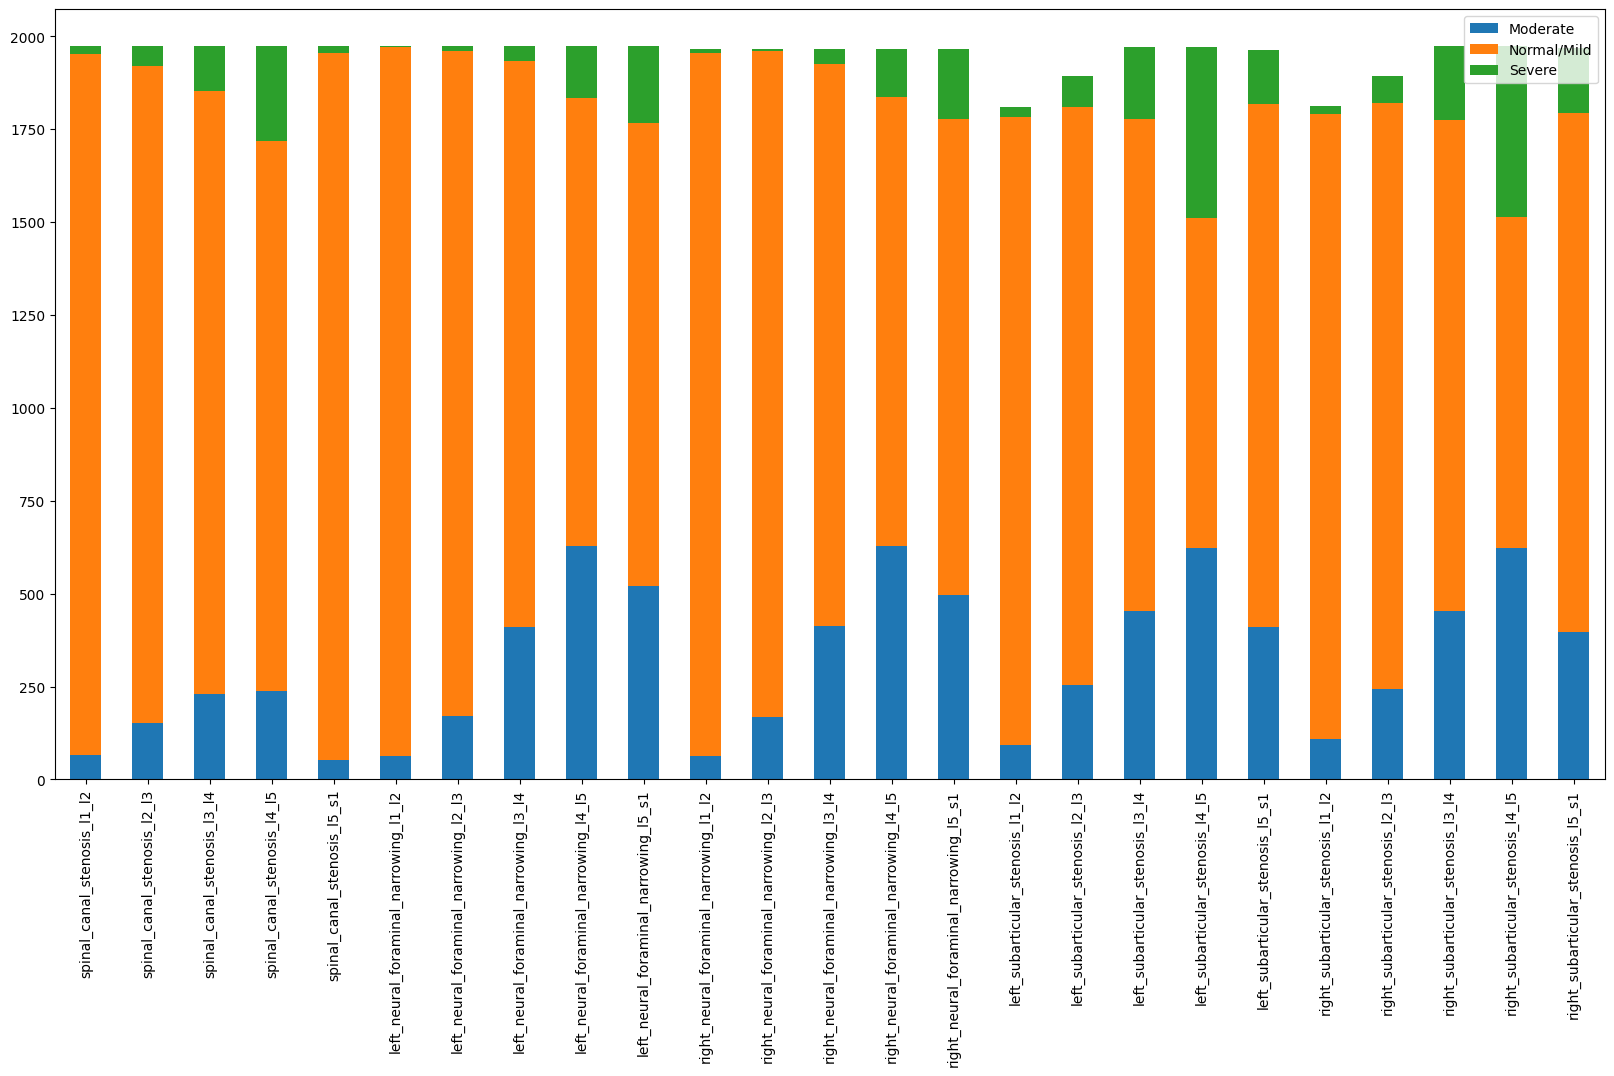

In [29]:
train_counts = {}
for col in train.columns[1:]:
    train_counts[col] = train[col].value_counts()
    # print(col, train[col].value_counts())
train_counts_df = pd.DataFrame(train_counts).T
# categorical plot seaborn countplot
train_counts_df.plot(kind='bar', stacked=True, figsize=(20, 10))

<Axes: >

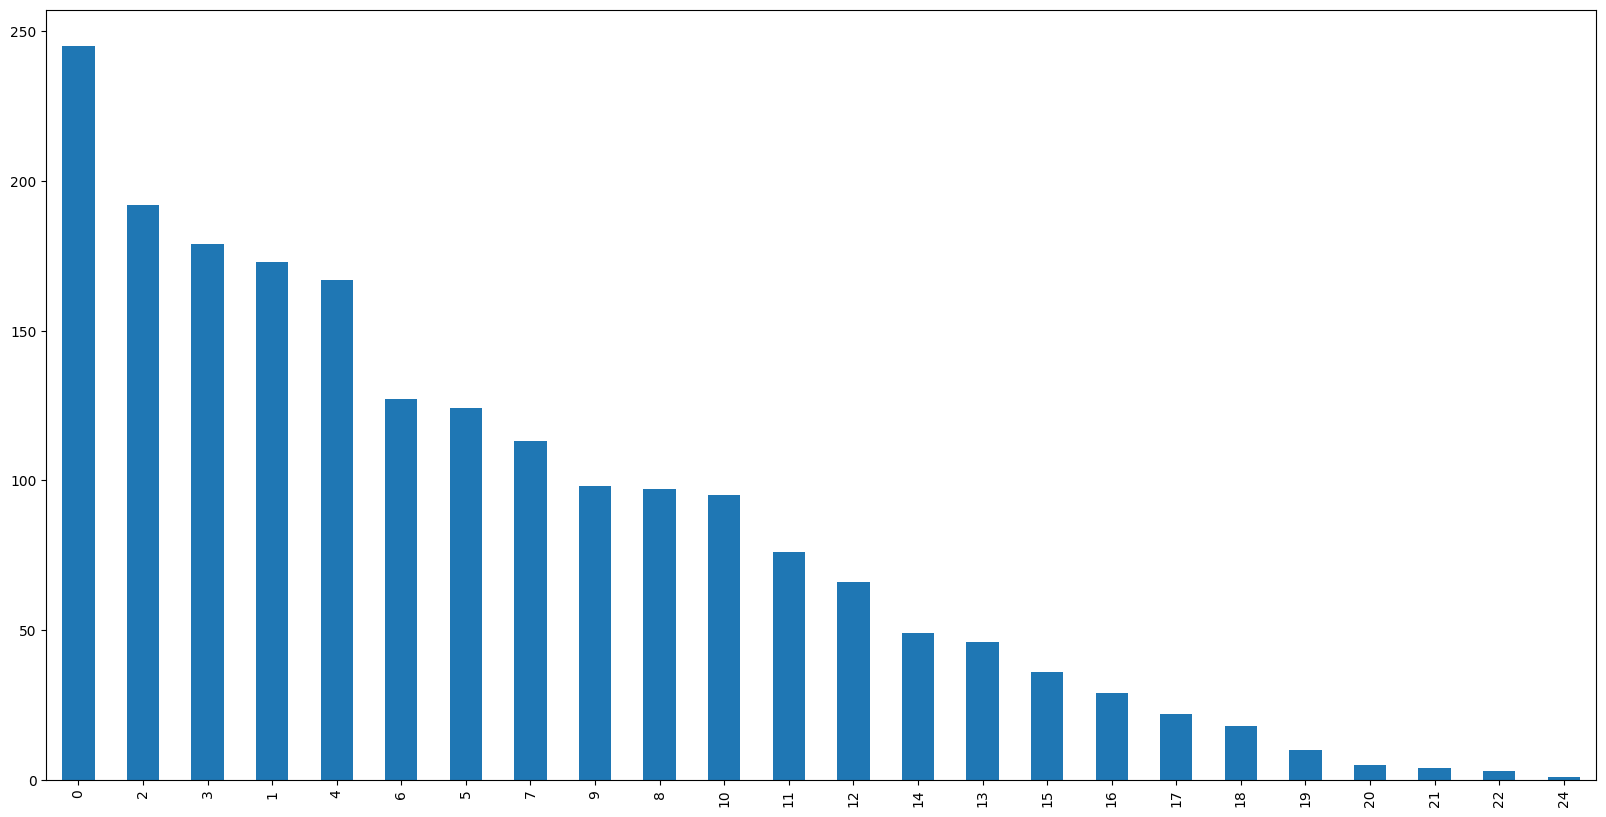

In [30]:
sites_affected_count = (train[train.columns[1:]]!="Normal/Mild").sum(axis=1)
sites_affected_count.value_counts().plot(kind='bar', figsize=(20, 10))

In [31]:
descriptions.head()

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1


In [32]:
descriptions.groupby("study_id").count()["series_id"].value_counts()

series_id
3    1632
4     309
5      30
2       3
6       1
Name: count, dtype: int64

In [33]:
descriptions.sort_values(["study_id", "series_description"]).groupby("study_id").apply(lambda x: [(sid,d) for sid,d in zip(x["series_id"],x["series_description"]) ] )

/var/folders/gc/5n7c81711pnf1sc4dvlbd67r0000gn/T/ipykernel_64491/1027123770.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  descriptions.sort_values(["study_id", "series_description"]).groupby("study_id").apply(lambda x: [(sid,d) for sid,d in zip(x["series_id"],x["series_description"]) ] )


study_id
4003253       [(2448190387, Axial T2), (1054713880, Sagittal...
4646740       [(3201256954, Axial T2), (3486248476, Sagittal...
7143189       [(1951927562, Axial T2), (3219733239, Sagittal...
8785691       [(2406919186, Axial T2), (1570286759, Sagittal...
10728036      [(142859125, Axial T2), (2073726394, Axial T2)...
                                    ...                        
4282019580    [(121051321, Axial T2), (3029774733, Sagittal ...
4283570761    [(3321662903, Axial T2), (2708429184, Sagittal...
4284048608    [(3891595425, Axial T2), (1875151370, Sagittal...
4287160193    [(1820446240, Axial T2), (327893304, Sagittal ...
4290709089    [(3390218084, Axial T2), (4237840455, Sagittal...
Length: 1975, dtype: object

In [34]:
# get all combinations of series_description per study_id
descriptions.sort_values(["study_id", "series_description"]).groupby("study_id")["series_description"].apply(", ".join).value_counts()

series_description
Axial T2, Sagittal T1, Sagittal T2/STIR                                  1632
Axial T2, Axial T2, Sagittal T1, Sagittal T2/STIR                         304
Axial T2, Axial T2, Axial T2, Sagittal T1, Sagittal T2/STIR                28
Axial T2, Sagittal T1, Sagittal T1, Sagittal T2/STIR                        5
Axial T2, Sagittal T2/STIR                                                  2
Axial T2, Axial T2, Sagittal T1, Sagittal T1, Sagittal T2/STIR              2
Axial T2, Sagittal T1                                                       1
Axial T2, Axial T2, Axial T2, Axial T2, Sagittal T1, Sagittal T2/STIR       1
Name: count, dtype: int64

It seems that there are extra sequences, mostly axial T2. Why is that?

In [35]:
desc_coords = pd.merge(descriptions, coordinates, on=["study_id", "series_id"], how="inner")
desc_coords.head()

,study_id,series_id,series_description,instance_number,condition,level,x,y,condition_level
0,4003253,702807833,Sagittal T2/STIR,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,spinal_canal_stenosis_l1_l2
1,4003253,702807833,Sagittal T2/STIR,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,spinal_canal_stenosis_l2_l3
2,4003253,702807833,Sagittal T2/STIR,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,spinal_canal_stenosis_l3_l4
3,4003253,702807833,Sagittal T2/STIR,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,spinal_canal_stenosis_l4_l5
4,4003253,702807833,Sagittal T2/STIR,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,spinal_canal_stenosis_l5_s1


In [36]:
desc_coords["condition"].unique()

array(['Spinal Canal Stenosis', 'Right Neural Foraminal Narrowing',
       'Left Neural Foraminal Narrowing', 'Left Subarticular Stenosis',
       'Right Subarticular Stenosis'], dtype=object)

In [37]:
desc_coords.groupby("series_description")["study_id"].count()

series_description
Axial T2            19220
Sagittal T1         19724
Sagittal T2/STIR     9748
Name: study_id, dtype: int64

In [38]:
desc_coords.groupby(["study_id", "series_id", "series_description"]).count()

instance_number  condition  level  \
study_id   series_id  series_description                                      
4003253    702807833  Sagittal T2/STIR                  5          5      5   
           1054713880 Sagittal T1                      10         10     10   
           2448190387 Axial T2                         10         10     10   
4646740    3201256954 Axial T2                         10         10     10   
           3486248476 Sagittal T1                      10         10     10   
...                                                   ...        ...    ...   
4287160193 1507070277 Sagittal T2/STIR                  5          5      5   
           1820446240 Axial T2                         10         10     10   
4290709089 3274612423 Sagittal T2/STIR                  5          5      5   
           3390218084 Axial T2                         10         10     10   
           4237840455 Sagittal T1                      10         10     10   

                                           x   y  condition_level  
study_id   series_id  series_description                           
4003253    702807833  Sagittal T2/STIR     5   5                5  
           1054713880 Sagittal T1         10  10               10  
           2448190387 Axial T2            10  10               10  
4646740    3201256954 Axial T2            10  10               10  
           3486248476 Sagittal T1         10  10               10  
...                                       ..  ..              ...  
4287160193 1507070277 Sagittal T2/STIR     5   5                5  
           1820446240 Axial T2            10  10               10  
4290709089 3274612423 Sagittal T2/STIR     5   5                5  
           3390218084 Axial T2            10  10               10  
           4237840455 Sagittal T1         10  10               10  

[6291 rows x 6 columns]

In [39]:
coordinates.head()

,study_id,series_id,instance_number,condition,level,x,y,condition_level
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,spinal_canal_stenosis_l1_l2
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,spinal_canal_stenosis_l2_l3
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,spinal_canal_stenosis_l3_l4
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,spinal_canal_stenosis_l4_l5
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,spinal_canal_stenosis_l5_s1


In [40]:
coordinates.groupby("study_id").size().value_counts()

25    1789
23      57
21      47
19      38
22      30
24      10
15       2
17       1
Name: count, dtype: int64

In [41]:
coordinates.groupby(["study_id", "series_id", "instance_number"])["level"].count()

study_id    series_id   instance_number
4003253     702807833   8                  5
            1054713880  4                  2
                        5                  1
                        6                  2
                        11                 3
                                          ..
4290709089  3390218084  21                 1
            4237840455  4                  4
                        5                  1
                        11                 1
                        12                 4
Name: level, Length: 24546, dtype: int64

In [42]:
submissions.head()

,row_id,normal_mild,moderate,severe
0,44036939_left_neural_foraminal_narrowing_l1_l2,0.333333,0.333333,0.333333
1,44036939_left_neural_foraminal_narrowing_l2_l3,0.333333,0.333333,0.333333
2,44036939_left_neural_foraminal_narrowing_l3_l4,0.333333,0.333333,0.333333
3,44036939_left_neural_foraminal_narrowing_l4_l5,0.333333,0.333333,0.333333
4,44036939_left_neural_foraminal_narrowing_l5_s1,0.333333,0.333333,0.333333


Additional metadata read from DICOM files:

In [43]:
meta = pd.read_csv("data/meta.csv")
meta.head()

,path,PatientID,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,PixelSpacing,SliceThickness,SpacingBetweenSlices,ImagePositionPatient,ImageOrientationPatient,Rows,Columns
0,/Volumes/T7/datasets/spine/train_images/783021...,783021102,783021102,7.830211e+08,783021102.1.1,"[0.5625, 0.5625]",4.0,4.4,"[-71.596490510604, -43.549615824432, -333.2694...","[0.99997564765189, -0.0001827339763, -0.006976...",320,320
1,/Volumes/T7/datasets/spine/train_images/783021...,783021102,783021102,7.830211e+08,783021102.1.10,"[0.5625, 0.5625]",4.0,4.4,"[-71.872853883407, -44.586488688202, -372.8548...","[0.99997564765189, -0.0001827339763, -0.006976...",320,320
2,/Volumes/T7/datasets/spine/train_images/783021...,783021102,783021102,7.830211e+08,783021102.1.11,"[0.5625, 0.5625]",4.0,4.4,"[-71.903560289047, -44.701700175018, -377.2532...","[0.99997564765189, -0.0001827339763, -0.006976...",320,320
3,/Volumes/T7/datasets/spine/train_images/783021...,783021102,783021102,7.830211e+08,783021102.1.12,"[0.5625, 0.5625]",4.0,4.4,"[-71.934266694686, -44.816907847137, -381.6516...","[0.99997564765189, -0.0001827339763, -0.006976...",320,320
4,/Volumes/T7/datasets/spine/train_images/783021...,783021102,783021102,7.830211e+08,783021102.1.13,"[0.5625, 0.5625]",4.0,4.4,"[-71.964973100326, -44.932115519256, -386.0500...","[0.99997564765189, -0.0001827339763, -0.006976...",320,320


In [44]:
meta["short_path"] = meta["path"].apply(lambda x: "/".join(x.split("/")[6:]))
meta["study_id"] = meta["short_path"].apply(lambda x: x.split("/")[0])
meta["series_id"] = meta["short_path"].apply(lambda x: x.split("/")[1])
meta["instance_number"] = meta["short_path"].apply(lambda x: x.split("/")[2].split(".")[0])

In [45]:
meta.head()

,path,PatientID,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,PixelSpacing,SliceThickness,SpacingBetweenSlices,ImagePositionPatient,ImageOrientationPatient,Rows,Columns,short_path,study_id,series_id,instance_number
0,/Volumes/T7/datasets/spine/train_images/783021...,783021102,783021102,7.830211e+08,783021102.1.1,"[0.5625, 0.5625]",4.0,4.4,"[-71.596490510604, -43.549615824432, -333.2694...","[0.99997564765189, -0.0001827339763, -0.006976...",320,320,783021102/1068933965/1.dcm,783021102,1068933965,1
1,/Volumes/T7/datasets/spine/train_images/783021...,783021102,783021102,7.830211e+08,783021102.1.10,"[0.5625, 0.5625]",4.0,4.4,"[-71.872853883407, -44.586488688202, -372.8548...","[0.99997564765189, -0.0001827339763, -0.006976...",320,320,783021102/1068933965/10.dcm,783021102,1068933965,10
2,/Volumes/T7/datasets/spine/train_images/783021...,783021102,783021102,7.830211e+08,783021102.1.11,"[0.5625, 0.5625]",4.0,4.4,"[-71.903560289047, -44.701700175018, -377.2532...","[0.99997564765189, -0.0001827339763, -0.006976...",320,320,783021102/1068933965/11.dcm,783021102,1068933965,11
3,/Volumes/T7/datasets/spine/train_images/783021...,783021102,783021102,7.830211e+08,783021102.1.12,"[0.5625, 0.5625]",4.0,4.4,"[-71.934266694686, -44.816907847137, -381.6516...","[0.99997564765189, -0.0001827339763, -0.006976...",320,320,783021102/1068933965/12.dcm,783021102,1068933965,12
4,/Volumes/T7/datasets/spine/train_images/783021...,783021102,783021102,7.830211e+08,783021102.1.13,"[0.5625, 0.5625]",4.0,4.4,"[-71.964973100326, -44.932115519256, -386.0500...","[0.99997564765189, -0.0001827339763, -0.006976...",320,320,783021102/1068933965/13.dcm,783021102,1068933965,13


In [46]:
meta_first = meta.groupby(["study_id", "series_id"]).first()

In [47]:
meta_first["Rows"].value_counts().sort_index()

Rows
192      4
204      2
224     18
232      9
240      2
        ..
920      4
960      2
984      1
996      2
1024    19
Name: count, Length: 90, dtype: int64

<Axes: xlabel='Rows'>

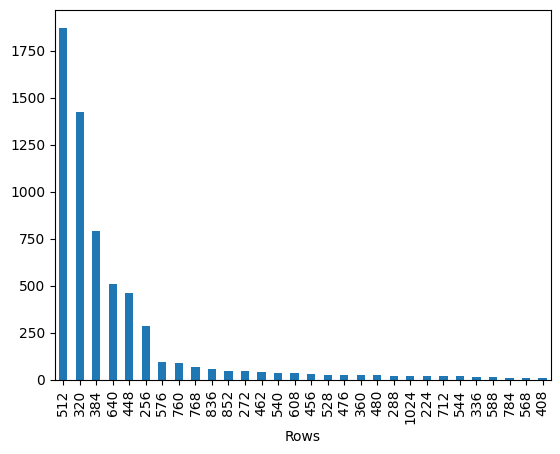

In [48]:
meta_first["Rows"].value_counts()[:30].plot(kind='bar')

In [49]:
meta_first["PixelSpacing"].value_counts()

PixelSpacing
[0.625, 0.625]                          392
[0.5469, 0.5469]                        321
[0.78125, 0.78125]                      309
[0.68359375, 0.68359375]                281
[0.9375, 0.9375]                        279
                                       ... 
[1.15384614467620, 1.15384614467620]      1
[0.88235294818878, 0.88235294818878]      1
[0.3778, 0.3778]                          1
[0.7721, 0.7721]                          1
[0.568182, 0.568182]                      1
Name: count, Length: 253, dtype: int64